In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds

In [2]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [3]:
# Load data
root = '/home/tc/OneDrive/Software/MSFiltration/experiments/results/'

# with open(root+'stability_sbm_05-04_06:55.pkl', 'rb') as handle:
#     results_sbm = pickle.load(handle)

# persistence_sbm = results_sbm['persistence']

with open(root+'bootstrap_er_05-05_01:21.pkl', 'rb') as handle:
    results_er = pickle.load(handle)

persistence_er = results_er['persistence']

In [5]:
tmin = -1.5
tmax = 0.5
delta = 0.1*abs(tmax-tmin)
infinity = tmax+delta

In [6]:
import matplotlib.patches as mpatches

In [11]:
def plot_pds(all_persistences,alpha=0.1):

    # font size
    plt.rcParams.update({"font.size": 15})

    # create axis
    fig, ax = plt.subplots(1, figsize=(8, 7))

    # define colormap
    colormap = plt.cm.Set1.colors

    # infinity line
    ax.plot(
        [tmin - 0.5 * delta, tmax],
        [infinity, infinity],
        linewidth=1.0,
        color="k",
        alpha=0.5,
    )

    # plot persistences
    for i in range(100):
        for dim in range(3):
            persistences = all_persistences[i][dim]
            if i == 0:
                if len(persistences) > 0:
                    ax.scatter(
                        persistences[:, 0],
                        np.nan_to_num(persistences[:, 1], posinf=infinity),
                        color=colormap[dim],
                        alpha=alpha,
                        label=r"$H_{}$".format(dim),
                    )
            else:
                if len(persistences) > 0:
                    ax.scatter(
                        persistences[:, 0],
                        np.nan_to_num(persistences[:, 1], posinf=infinity),
                        color=colormap[dim],
                        alpha=alpha
                    )

    # plot top line
    ax.plot([tmin - 0.5 * delta, tmax], [tmax, tmax], linewidth=1.0, color="k")

    # plot diag
    ax.plot([tmin, tmax], [tmin, tmax], linewidth=1.0, color="k")

    # plot lower diag patch
    ax.add_patch(
        mpatches.Polygon(
            [[tmin, tmin], [tmax, tmin], [tmax, tmax]], fill=True, color="lightgrey"
        )
    )

    # labels and axes limits
    ax.set(
        xlabel="Birth",
        ylabel="Death",
        xlim=(tmin - 0.5 * delta, tmax),
        ylim=(tmin, infinity + 0.5 * delta),
    )

    # Infinity and y-axis label
    yt = ax.get_yticks()
    yt = yt[np.where(yt <= tmax)]  # to avoid ploting ticklabel higher than infinity
    yt = np.append(yt, infinity)
    ytl = ["%.2f" % e for e in yt]  # to avoid float precision error
    ytl[-1] = r"$+\infty$"
    ax.set_yticks(yt)
    ax.set_yticklabels(ytl)

    # x-axis label
    ax.set_xticks(yt[:-1])
    ax.set_xticklabels(ytl[:-1])

    ax.legend(loc=4)

    return fig

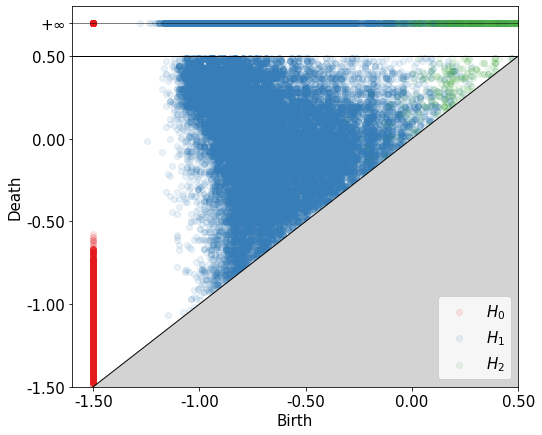

In [17]:
fig = plot_pds(persistence_er)
plt.savefig(root_fig +'stability_er.jpeg', dpi=500,bbox_inches='tight')

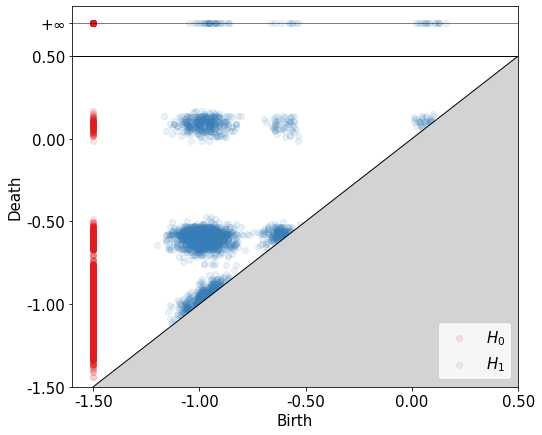

In [18]:
fig = plot_pds(persistence_sbm)
plt.savefig(root_fig +'stability_sbm.jpeg', dpi=500,bbox_inches='tight')